In [1]:
from google.colab import files
import pandas as pd

# Open file picker to upload your CSV
uploaded = files.upload()


Saving cleaned_ebay_deals.csv to cleaned_ebay_deals.csv


In [2]:
# Replace 'ebay_tech_deals.csv' with the exact filename you uploaded
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# See the first rows
df.head()


,timestamp,title,price,original_price,shipping,item_url,discount_percentage
0,2025-11-02 13:00:16,NaN,NaN,NaN,Shipping info unavailable,https://www.ebay.com/itm/384235550388?_trkparm...,NaN
1,2025-11-02 13:00:16,NaN,29.99,29.99,Shipping info unavailable,NaN,0.00
2,2025-11-02 13:00:17,Apple iPhone 14 128GB Unlocked - Excellent,310.95,310.95,Shipping info unavailable,https://www.ebay.com/itm/364506177072?_trkparm...,0.00
3,2025-11-02 13:00:17,Lenovo Legion 5 15.1 OLED WQXGA 165HZ Gaming N...,999.99,1399.99,Shipping info unavailable,https://www.ebay.com/itm/127210724599?_trkparm...,28.57
4,2025-11-02 13:00:18,Samsung Galaxy Buds FE True Wireless Bluetooth...,40.05,40.05,Shipping info unavailable,https://www.ebay.com/itm/285820041847?_trkparm...,0.00


In [4]:
# 1. Setup and Load Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots for Colab
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Load the cleaned CSV
df = pd.read_csv("cleaned_ebay_deals.csv")

# Quick look at data
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            284 non-null    object 
 1   title                249 non-null    object 
 2   price                251 non-null    float64
 3   original_price       251 non-null    float64
 4   shipping             284 non-null    object 
 5   item_url             283 non-null    object 
 6   discount_percentage  251 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.7+ KB


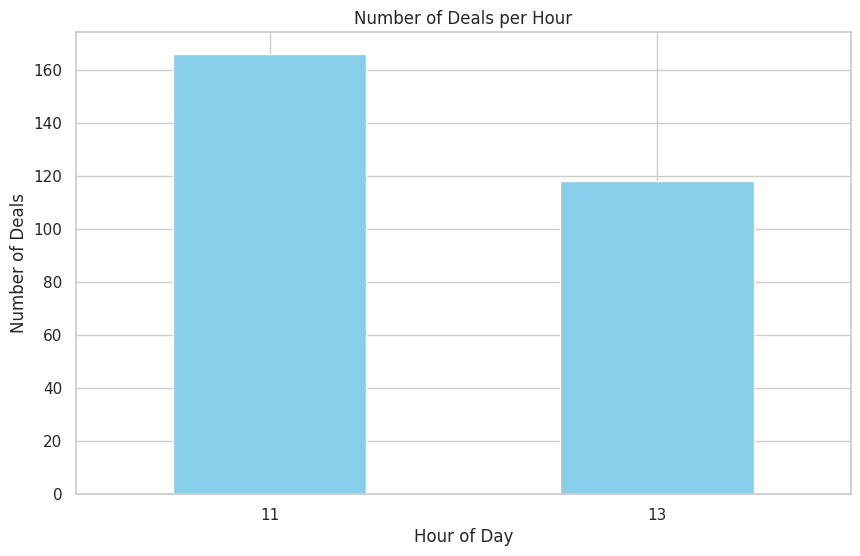

In [5]:
# 2. Time Series Analysis


# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by timestamp
df.sort_values(by='timestamp', inplace=True)

# Extract hour
df['hour'] = df['timestamp'].dt.hour

# Group by hour
deals_per_hour = df.groupby('hour').size()

# Plot bar chart: deals per hour
plt.figure(figsize=(10,6))
deals_per_hour.plot(kind='bar', color='skyblue')
plt.title("Number of Deals per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Deals")
plt.xticks(rotation=0)
plt.show()

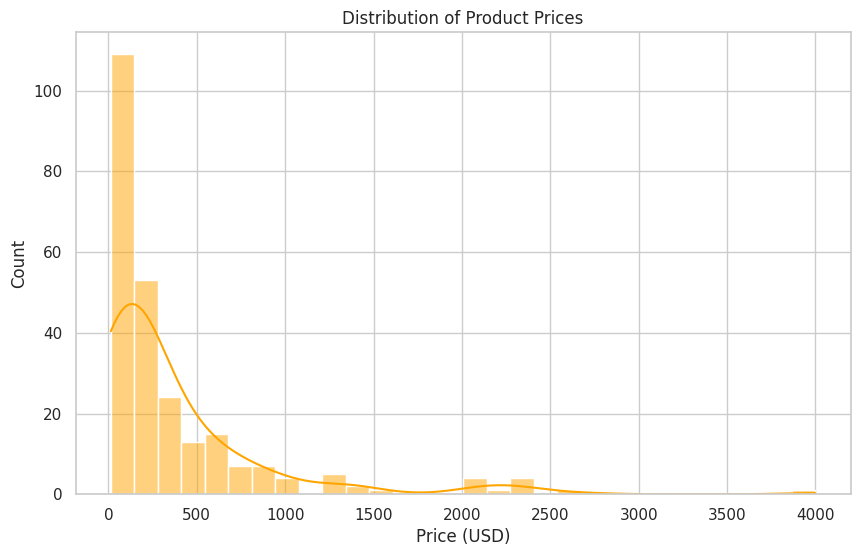

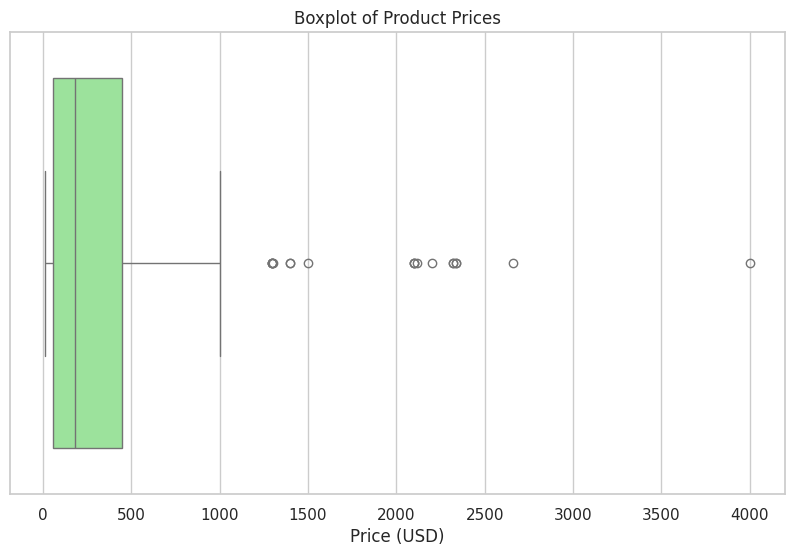

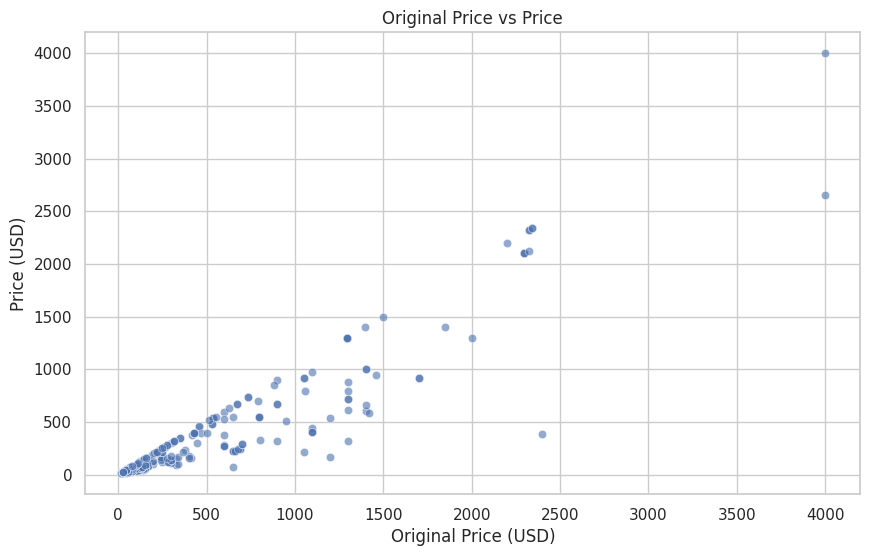

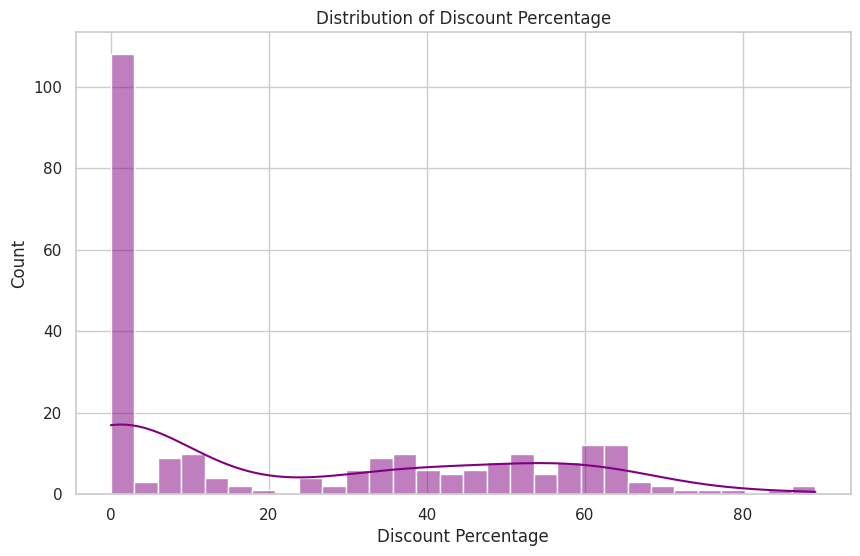

In [7]:
# 3. Price and Discount Analysis
# ========================

# Histogram of product prices
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True, color='orange')
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.show()

# Boxplot of product prices
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title("Boxplot of Product Prices")
plt.xlabel("Price (USD)")
plt.show()

# Scatter plot: original_price vs price
plt.figure(figsize=(10,6))
sns.scatterplot(x='original_price', y='price', data=df, alpha=0.6)
plt.title("Original Price vs Price")
plt.xlabel("Original Price (USD)")
plt.ylabel("Price (USD)")
plt.show()

# Distribution of discount_percentage
plt.figure(figsize=(10,6))
sns.histplot(df['discount_percentage'], bins=30, kde=True, color='purple')
plt.title("Distribution of Discount Percentage")
plt.xlabel("Discount Percentage")
plt.show()

/tmp/ipython-input-4162001142.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette="viridis")


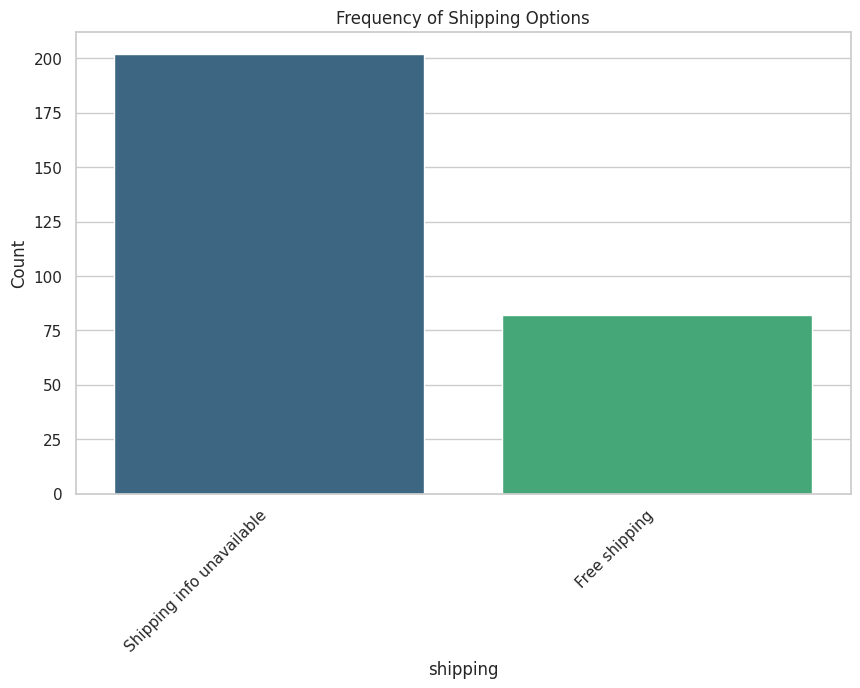

In [8]:
# 4. Shipping Information Analysis
# ========================

# Count frequency of shipping options
shipping_counts = df['shipping'].value_counts()

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Frequency of Shipping Options")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-496762508.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()), palette="magma")


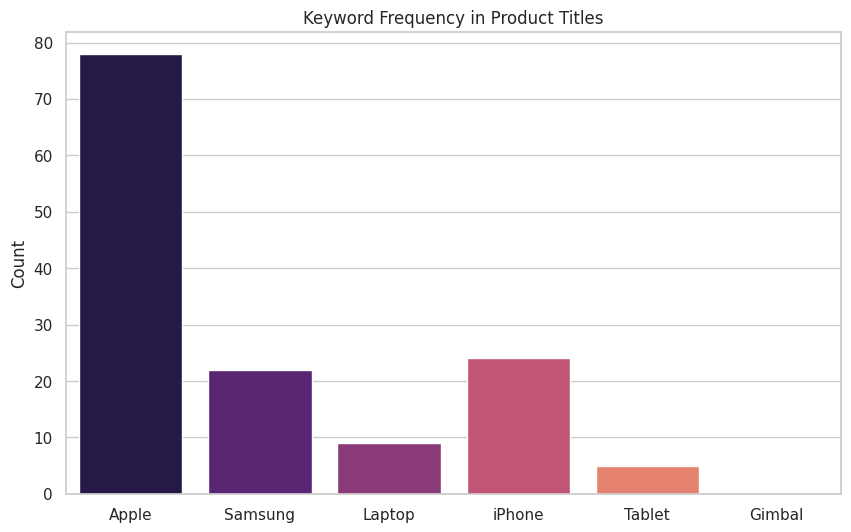

In [9]:
# 5. Text Analysis on Product Titles
# ========================

# Define keywords
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]

# Count keyword occurrences
keyword_counts = {}
for word in keywords:
    keyword_counts[word] = df['title'].str.contains(word, case=False, na=False).sum()

# Plot keyword frequencies
plt.figure(figsize=(10,6))
sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()), palette="magma")
plt.title("Keyword Frequency in Product Titles")
plt.ylabel("Count")
plt.show()


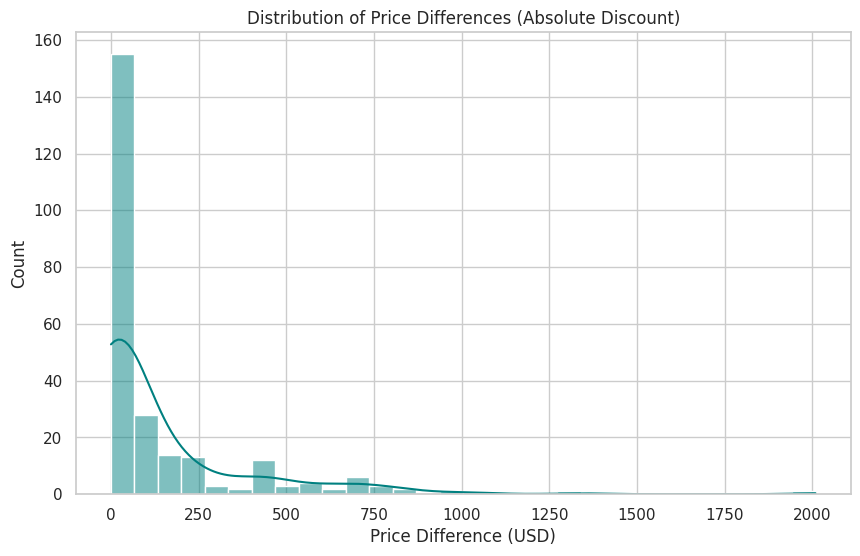

In [10]:
# 6. Price Difference Analysis
# ========================

# Compute absolute discount
df['price_difference'] = df['original_price'] - df['price']

# Histogram of price differences
plt.figure(figsize=(10,6))
sns.histplot(df['price_difference'], bins=30, kde=True, color='teal')
plt.title("Distribution of Price Differences (Absolute Discount)")
plt.xlabel("Price Difference (USD)")
plt.show()

In [11]:
# 7. Top Discounts
# ========================

# Sort by discount_percentage descending
top_discounts = df.sort_values(by='discount_percentage', ascending=False).head(5)
top_discounts[['title', 'price', 'original_price', 'discount_percentage', 'item_url']]

,title,price,original_price,discount_percentage,item_url
149,"Apple iPhone 7 PLUS 5.5"" GSM Factory Unlocked ...",69.99,650.00,89.23,https://www.ebay.com/itm/192666024808?_trkparm...
137,Samsung Galaxy S22 S901 128GB Unlocked - Excel...,163.95,1199.99,86.34,https://www.ebay.com/itm/364498823740?_trkparm...
26,"2019 Apple MacBook Pro 16"" i7 2.6GHz/16GB/512G...",389.67,2399.00,83.76,https://www.ebay.com/itm/374766179675?_trkparm...
141,Samsung Galaxy S22 Plus S906 256GB Unlocked - ...,212.95,1049.99,79.72,https://www.ebay.com/itm/405287989392?_trkparm...
132,Samsung Galaxy S22 Ultra 512GB S908U Unlocked ...,316.99,1299.00,75.60,https://www.ebay.com/itm/256483219243?_trkparm...
